## Potrzebne import-y

In [28]:
from sklearn.model_selection import train_test_split
from GaussianNaiveBayesClassifier import GaussianNaiveBayesClassifier
from MultinomialNaiveBayesClassifier import MultinomialNaiveBayesClassifier
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Multinomial Naive Bayes Classifier (MNBC)

## Definicja danych

In [29]:
mushroomDataPath = "../../data/mushrooms.csv"
mushroomDataFrame = pd.read_csv(mushroomDataPath)
trainSet, testSet = train_test_split(mushroomDataFrame,test_size=0.95,random_state=15)

## Zasada działania MNBC
**Multinomial Naive Bayes Classifier (MNBC)** (po polsku Wielomianowy Naiwny Klasyfikator Bayes-owski) to probabilistyczny model uczenia maszynowego, który znajduje zastosowanie głównie w zadaniach klasyfikacyjnych na danych dyskretnych, takich jak klasyfikacja tekstu (np. detekcja spamu). MNBC zakłada, że cechy (atrybuty) mają rozkład multinomialny i są warunkowo niezależne względem etykiety klasy.

#### Kroki trenowania i zastosowanie MNBC:
1. **Przetwarzanie danych**: 
   - Zliczanie wystąpień cech (np. słów w dokumentach tekstowych) dla każdej klasy.
   - Stosowanie parametru wygładzania ($ \alpha $) w celu uwzględnienia niewidzianych kombinacji cech i klas.

2. **Uczenie (Dopasowanie)**:
   - Obliczanie prawdopodobieństw klas ($ P(C) $) jako proporcji próbek należących do każdej klasy.
   - Obliczanie prawdopodobieństwa warunkowego cechy $ X_i $ dla klasy $ C $ według wzoru:
     $
     P(X_i | C) = \frac{\text{Count}(X_i, C) + \alpha}{\text{Total Count of Traits in } C + \alpha \cdot \text{Number of Traits}}
     $

3. **Predykcja**:
   - Użycie twierdzenia Bayesa do obliczenia prawdopodobieństw a posteriori dla każdej klasy:
     $
     P(C | X) \propto P(C) \cdot \prod_{i} P(X_i | C)
     $
   - Przypisanie klasy $ C $, która ma najwyższe prawdopodobieństwo a posteriori.

#### Implementacja w Pythonie:
Podana klasa **MultinomialNaiveBayesClassifier** implementuje tę logikę:
- Metoda `fit` przetwarza dane kategoryczne, przechowując słowniki z licznością cech, licznością klas i prawdopodobieństwami warunkowymi, następnie stosowane jest wygładzanie addytywne ($ \alpha $), aby zapewnić odporność predykcji nawet dla niewidzianych kombinacji cech i klas.
- Metoda `predict` oblicza prawdopodobieństwa a posteriori (przeliczone na skalę logarytminczą) dla wszystkich klas i wybiera najbardziej prawdopodobną.
- Metoda `predict_proba` oblicza prawdopodobieństwa a posteriori (--||--) dla wszystkich klas i zwraca słownik `klasa : wartość` 


## Trenowanie modelu

In [30]:
mnbc = MultinomialNaiveBayesClassifier()
mnbc.fit(trainSet)
print(mnbc.test_accuracy(trainSet))

Testing after training
0.9113300492610837


c:\Users\X\Documents\College\CS\sem3\Statistic_and_probability\Naive_Bayes_Project\src\naive_bayes\MultinomialNaiveBayesClassifier.py:173: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if className == test[0]:
c:\Users\X\Documents\College\CS\sem3\Statistic_and_probability\Naive_Bayes_Project\src\naive_bayes\MultinomialNaiveBayesClassifier.py:181: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if newClassName == test[0]:


## Weryfikacja poprawności modelu

### Sprawdzenie dokładności modelu

Dokładność modelu (accuracy) jest jednym z podstawowych wskaźników skuteczności klasyfikatora. Obliczana jest jako stosunek liczby poprawnie sklasyfikowanych przypadków do całkowitej liczby przypadków w zestawie testowym. 

W poniższym przykładzie używamy zestawu testowego, który został wyodrębniony z pełnego zbioru danych w trakcie jego podziału na dane treningowe i testowe.


In [27]:
# Sprawdzenie dokładności modelu w %
accuracy = mnbc.test_accuracy(testSet)
print(f"Dokładność modelu na zbiorze testowym: {accuracy * 100:.2f}%")

Testing after training
Dokładność modelu na zbiorze testowym: 90.49%


### Sprawdzenie pod kątem overfittingu

Model może osiągać wysoką skuteczność na danych treningowych, ale być nieskuteczny na danych testowych, co wskazuje na overfitting. Aby to sprawdzić, porównujemy dokładność na danych treningowych i testowych.

Jeżeli dokładności na zbiorze treningowym i testowym są zbliżone, oznacza to, że nie wystąpiło nadmierne dopasowanie. Jeśli jednak wartość zbioru treningowego jest dużo większa niż testowego, można podejrzewać overfitting.

In [26]:
# Porównanie dokładności na zbiorze treningowym i testowym dla wykrycia nadmiernego dopasowania
train_accuracy = mnbc.test_accuracy(trainSet)
test_accuracy = mnbc.test_accuracy(testSet)

print(f"Dokładność modelu na zbiorze treningowym: {train_accuracy * 100:.2f}%")
print(f"Dokładność modelu na zbiorze testowym: {test_accuracy * 100:.2f}%")


Testing after training
Testing after training
Dokładność modelu na zbiorze treningowym: 91.13%
Dokładność modelu na zbiorze testowym: 90.49%


### Macierz konfuzji (Confusion Matrix)

Macierz konfuzji przedstawia szczegółowy rozkład przewidywań modelu względem rzeczywistych wartości klas. Daje ona możliwość analizy liczby prawidłowych i błędnych klasyfikacji dla każdej klasy.

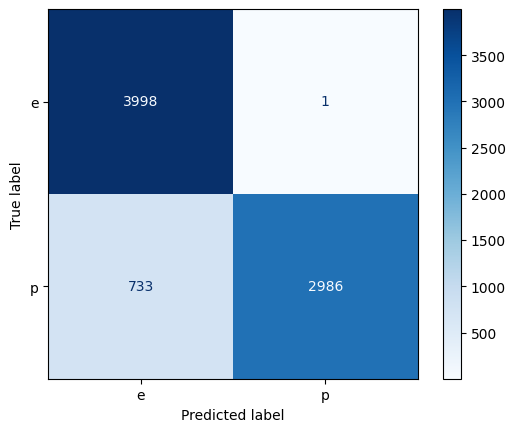

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = testSet.iloc[:, 0]  # Rzeczywiste klasy (pierwsza kolumna)
y_pred = [mnbc.predict(row[1:])[0] for _, row in testSet.iterrows()]  # Przewidywane klasy

# Obliczenie macierzy konfuzji
cm = confusion_matrix(y_true, y_pred, labels=list(mnbc.classes))

# Wizualizacja macierzy konfuzji
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(mnbc.classes))
disp.plot(cmap="Blues")


### Analiza błędów klasyfikacji

Analiza błędów klasyfikacji pozwala zrozumieć, które klasy są najczęściej mylone przez model. W przypadku znaczących błędów klasyfikacji można rozważyć modyfikację danych treningowych lub użycie innych cech w modelu.


In [7]:
misclassified = testSet[y_true != y_pred]
print("Błędnie sklasyfikowane przypadki:")
print(misclassified)


Błędnie sklasyfikowane przypadki:
     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
3868     p         x           f         w       f    c               f   
3525     p         x           f         p       f    c               f   
5908     p         x           s         g       t    f               f   
5531     p         f           s         b       t    f               f   
3738     p         x           f         w       f    c               f   
...    ...       ...         ...       ...     ...  ...             ...   
950      p         x           y         w       t    p               f   
3754     p         x           f         w       f    c               f   
5889     p         f           s         b       t    f               f   
3543     p         x           s         p       f    c               f   
138      p         x           s         n       t    p               f   

     gill-spacing gill-size gill-color  ... stalk-surface-below-r

### Wskaźniki jakości klasyfikacji

Dodatkowymi wskaźnikami jakości klasyfikacji są:
- **Precision**: dokładność przewidywań dla danej klasy,
- **Recall**: zdolność modelu do prawidłowego identyfikowania przypadków danej klasy,
- **F1-score**: harmoniczna średnia precision i recall.


In [8]:
from sklearn.metrics import classification_report

# Raport z wskaźnikami jakości klasyfikacji
report = classification_report(y_true, y_pred, target_names=list(mnbc.classes))
print("Raport jakości klasyfikacji:\n")
print(report)


Raport jakości klasyfikacji:

              precision    recall  f1-score   support

           e       0.85      1.00      0.92      3999
           p       1.00      0.80      0.89      3719

    accuracy                           0.90      7718
   macro avg       0.92      0.90      0.90      7718
weighted avg       0.92      0.90      0.90      7718



### ROC - AUC

ROC (Receiver Operating Characteristic) to wykres przedstawiający zdolność modelu do klasyfikacji na podstawie różnych progów decyzyjnych. AUC (Area Under the Curve) to pole pod krzywą ROC, które pozwala ocenić jakość modelu – im bliżej 1, tym lepszy model.

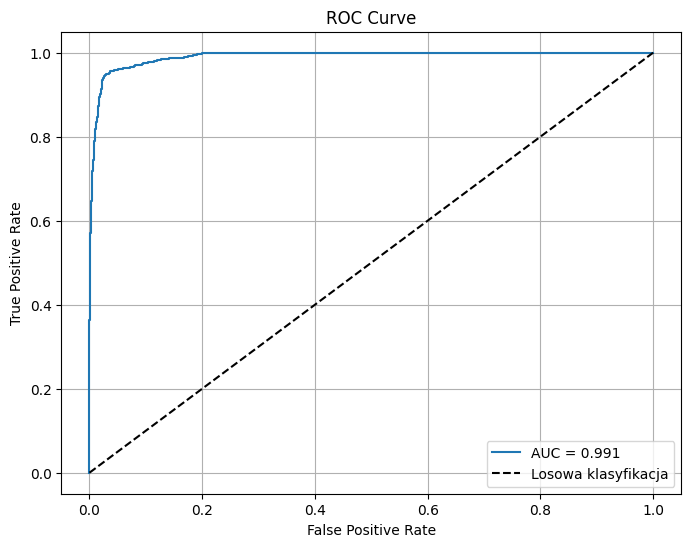

ROC-AUC Score: 0.991


In [ ]:
# Generowane
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_auc(mnbc, testSet):
    y_true = testSet.iloc[:, 0]  # Pierwsza kolumna (klasy prawdziwe)
    y_scores = []

    for _, row in testSet.iterrows():
        proba = mnbc.predict_proba(row[1:])  # Prawdopodobieństwa dla każdej klasy
        y_scores.append(proba['e'] if 'e' in proba else 0)  # Przykład: klasyfikacja 'edible' vs 'poisonous'

    # Oblicz ROC i AUC
    fpr, tpr, _ = roc_curve(y_true.map({'e': 1, 'p': 0}), y_scores)  # Przyjęto 'e' jako pozytywna klasa
    auc_score = roc_auc_score(y_true.map({'e': 1, 'p': 0}), y_scores)

    # Wykres ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
    plt.plot([0, 1], [0, 1], 'k--', label='Losowa klasyfikacja')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    print(f"ROC-AUC Score: {auc_score:.3f}")

# Wywołanie funkcji
plot_roc_auc(mnbc, testSet)


### k-Fold Cross Validation

k-Fold Cross Validation pozwala na ocenę wydajności modelu poprzez podzielenie danych na k równych części (foldów). Model jest trenowany na k-1 częściach i testowany na pozostałej części, a wyniki są uśredniane.

In [31]:
from sklearn.model_selection import KFold
import numpy as np

def k_fold_cross_validation(mnbc, mushroomDataFrame, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    accuracies = []

    for train_index, test_index in kf.split(mushroomDataFrame):
        trainSet = mushroomDataFrame.iloc[train_index]
        testSet = mushroomDataFrame.iloc[test_index]

        mnbc.fit(trainSet)  # Trenuj model na danych treningowych
        accuracy = mnbc.test_accuracy(testSet)  # Sprawdź dokładność na danych testowych
        accuracies.append(accuracy)

    avg_accuracy = np.mean(accuracies)
    print(f"Średnia dokładność po {k}-Fold Cross Validation: {avg_accuracy:.3f}")
    return accuracies

# Wywołanie funkcji
k_fold_cross_validation(mnbc, mushroomDataFrame, k=5)


Testing after training
Testing after training
Testing after training
Testing after training
Testing after training
Średnia dokładność po 5-Fold Cross Validation: 0.936


[0.9341538461538461,
 0.9366153846153846,
 0.9335384615384615,
 0.9366153846153846,
 0.937192118226601]

# Gaussian Naive Bayes Classifier (GNBC)

## Definicja danych

In [32]:
dataPath = "../../data/iris.csv"
irisDataFrame = pd.read_csv(dataPath)
trainSet, testSet = train_test_split(irisDataFrame,test_size=0.3,random_state=15)

## Zasada działania GNBC
**Gaussian Naive Bayes Classifier (GNBC)** (po polsku Gauss-owski [oparty o rozkład normalny] Naiwny Klasyfikator Bayes-owski) to kolejna odmiana modelu Naive Bayes, wykorzystywana dla danych ciągłych. GNBC zakłada, że cechy mają rozkład normalny (Gaussa) w obrębie każdej klasy. Jest to odpowiednie dla zadań takich jak diagnostyka medyczna, gdzie dane wejściowe mogą reprezentować ciągłe pomiary.

#### Zasada działania i użycie GNBC:
1. **Przetwarzanie danych**:
   - Dla każdej cechy $X_i$ w każdej klasie $C$, szacuje się parametry rozkładu normalnego:
     - Średnia $( \mu )$: Średnia wartości cech w obrębie klasy.
     - Wariancja $(\sigma^2)$: Zmienność wartości cech w obrębie klasy.

2. **Uczenie (Dopasowanie)**:
   - Obliczanie funkcji gęstości prawdopodobieństwa (PDF) Gaussa dla każdej cechy:
     $
     P(X_i | C) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{(X_i - \mu)^2}{2 \sigma^2}\right)
     $
   - Obliczanie prawdopodobieństw klas $ P(C) $.

3. **Predykcja**:
   - Użycie twierdzenia Bayesa do obliczenia prawdopodobieństw a posteriori dla każdej klasy:
     $
     P(C | X) \propto P(C) \cdot \prod_{i} P(X_i | C)
     $
   - Przypisanie klasy $ C $, która ma najwyższe prawdopodobieństwo a posteriori.

#### Implementacja w Pythonie:
Klasa **NormalDistribution** implementuje funkcję gęstości prawdopodobieństwa dla GNBC:
- Metoda `fit_values` oblicza średnią i wariancję cechy.
- Metoda `get_value` oblicza wartość PDF Gaussa w określonym punkcie $x$.
- Ta klasa jest użyta jako podstawowy element GNBC, gdzie każda kombinacja cechy i klasy ma własną instancję `NormalDistribution`.


Zaimplementowana klasa **GaussianNaiveBayesClassifier** implementuje:
- Metoda `fit` przetwarza dane treningowe, obliczając liczności klas i cech oraz parametry rozkładu normalnego dla danych ciągłych, a także tworząc prawdopodobieństwa warunkowe dla danych kategorycznych. Dzięki zastosowaniu wygładzania addytywnego ($ \alpha $) model zapewnia odporność predykcji na niewidziane wcześniej kombinacje cech i klas.
- Metoda `predict` oblicza prawdopodobieństwa a posteriori (przeliczone na skalę logarytminczą) dla wszystkich klas i wybiera najbardziej prawdopodobną.
- Metoda `predict_proba` oblicza prawdopodobieństwa a posteriori (--||--) dla wszystkich klas i zwraca słownik `klasa : wartość` 


### Trenowanie modelu

In [33]:
gnbc = GaussianNaiveBayesClassifier()
gnbc.fit(trainSet)

## Weryfikacja poprawności modelu

### Sprawdzenie dokładności modelu

Dokładność modelu (accuracy) jest jednym z podstawowych wskaźników skuteczności klasyfikatora. Obliczana jest jako stosunek liczby poprawnie sklasyfikowanych przypadków do całkowitej liczby przypadków w zestawie testowym. 

W poniższym przykładzie używamy zestawu testowego, który został wyodrębniony z pełnego zbioru danych w trakcie jego podziału na dane treningowe i testowe.


In [34]:
# Sprawdzenie dokładności modelu
accuracy = gnbc.test_accuracy(testSet)
print(f"Dokładność modelu na zbiorze testowym: {accuracy * 100:.2f}%")

Dokładność modelu na zbiorze testowym: 93.33%


c:\Users\X\Documents\College\CS\sem3\Statistic_and_probability\Naive_Bayes_Project\src\naive_bayes\GaussianNaiveBayesClassifier.py:159: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if className == test[len(test)-1]:


### Sprawdzenie pod kątem overfittingu

Model może osiągać wysoką skuteczność na danych treningowych, ale być nieskuteczny na danych testowych, co wskazuje na overfitting. Aby to sprawdzić, porównujemy dokładność na danych treningowych i testowych.

Jeśli dokładność na danych treningowych jest znacznie wyższa niż na danych testowych, może to sugerować problem z nadmiernym dopasowaniem modelu do danych treningowych.


In [35]:
# Porównanie dokładności na zbiorze treningowym i testowym
train_accuracy = gnbc.test_accuracy(trainSet)
test_accuracy = gnbc.test_accuracy(testSet)

print(f"Dokładność modelu na zbiorze treningowym: {train_accuracy * 100:.2f}%")
print(f"Dokładność modelu na zbiorze testowym: {test_accuracy * 100:.2f}%")


Dokładność modelu na zbiorze treningowym: 88.57%


Dokładność modelu na zbiorze testowym: 93.33%


### Macierz konfuzji (Confusion Matrix)

Macierz konfuzji przedstawia szczegółowy rozkład przewidywań modelu względem rzeczywistych wartości klas. Daje ona możliwość analizy liczby prawidłowych i błędnych klasyfikacji dla każdej klasy.

Macierz ta składa się z czterech głównych wartości:
- **True Positive (TP)**: poprawne klasyfikacje do klasy pozytywnej,
- **True Negative (TN)**: poprawne klasyfikacje do klasy negatywnej,
- **False Positive (FP)**: błędne przypisanie do klasy pozytywnej,
- **False Negative (FN)**: błędne przypisanie do klasy negatywnej.

W tej sekcji zostanie przedstawiona wizualizacja oraz analiza wyników modelu.


In [36]:
y_true = testSet.iloc[:, 4]  # Rzeczywiste klasy (pierwsza kolumna)
y_pred = [gnbc.predict(row[:4]) for _, row in testSet.iterrows()]  # Przewidywane klasy

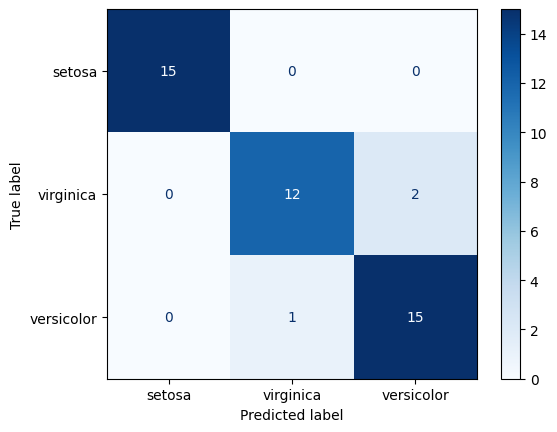

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Pobranie przewidywań modelu na zbiorze testowym
y_true = testSet.iloc[:, 4]  # Rzeczywiste klasy (pierwsza kolumna)
y_pred = [gnbc.predict(row[:4])[0] for _, row in testSet.iterrows()]  # Przewidywane klasy

# Obliczenie macierzy konfuzji
cm = confusion_matrix(y_true, y_pred, labels=list(gnbc.classes))

# Wizualizacja macierzy konfuzji
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(gnbc.classes))
disp.plot(cmap="Blues")


### Analiza błędów klasyfikacji

Analiza błędów klasyfikacji pozwala zrozumieć, które klasy są najczęściej mylone przez model. W przypadku znaczących błędów klasyfikacji można rozważyć modyfikację danych treningowych lub użycie innych cech w modelu.

W tej sekcji przedstawiono szczegóły dotyczące błędnie zaklasyfikowanych przypadków.


In [45]:
# Identyfikacja błędnie sklasyfikowanych przypadków
misclassified = testSet[y_true != y_pred]
print("Błędnie sklasyfikowane przypadki:")
y_misclassified = [gnbc.predict_proba(row[:4]) for _, row in misclassified.iterrows()]  # Dla sprawdzenia błędów w przewidywaniu
for index,y_m in enumerate(y_misclassified):
    print(f"{y_m}\n{misclassified.iloc[index]}") # Porównanie wartości, jak blisko były wartość prawdziwa z przewidzianą

Błędnie sklasyfikowane przypadki:
{'setosa': -191.8110661722921, 'virginica': -0.5358878221630392, 'versicolor': 0.3230997585996005}
sepal_length          6.2
sepal_width           2.8
petal_length          4.8
petal_width           1.8
species         virginica
Name: 126, dtype: object
{'setosa': -185.69452905949166, 'virginica': -0.5715875383626909, 'versicolor': -0.9780209513593632}
sepal_length           6.7
sepal_width            3.1
petal_length           4.7
petal_width            1.5
species         versicolor
Name: 86, dtype: object
{'setosa': -201.53011168331983, 'virginica': -0.2741980742312047, 'versicolor': -0.13137333058869194}
sepal_length          6.1
sepal_width           3.0
petal_length          4.9
petal_width           1.8
species         virginica
Name: 127, dtype: object


### Wskaźniki jakości klasyfikacji

Dodatkowymi wskaźnikami jakości klasyfikacji są:
- **Precision**: dokładność przewidywań dla danej klasy,
- **Recall**: zdolność modelu do prawidłowego identyfikowania przypadków danej klasy,
- **F1-score**: harmoniczna średnia precision i recall.

W tej sekcji obliczane są te wskaźniki dla każdej klasy.


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=list(gnbc.classes))
print("Raport jakości klasyfikacji:\n")
print(report)


Raport jakości klasyfikacji:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
   virginica       0.88      0.94      0.91        16
  versicolor       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



### ROC - AUC dla Iris Dataset

ROC (Receiver Operating Characteristic) to wykres przedstawiający zdolność modelu do klasyfikacji na podstawie różnych progów decyzyjnych. AUC (Area Under the Curve) to pole pod krzywą ROC, które pozwala ocenić jakość modelu – im bliżej 1, tym lepszy model.

W przypadku Iris dataset klasyfikujemy trzy gatunki kwiatów: `setosa`, `versicolor` i `virginica`. Aby zastosować ROC-AUC, zredukujemy problem do klasyfikacji binarnej, np. `versicolor` (1) vs. inne gatunki (0).


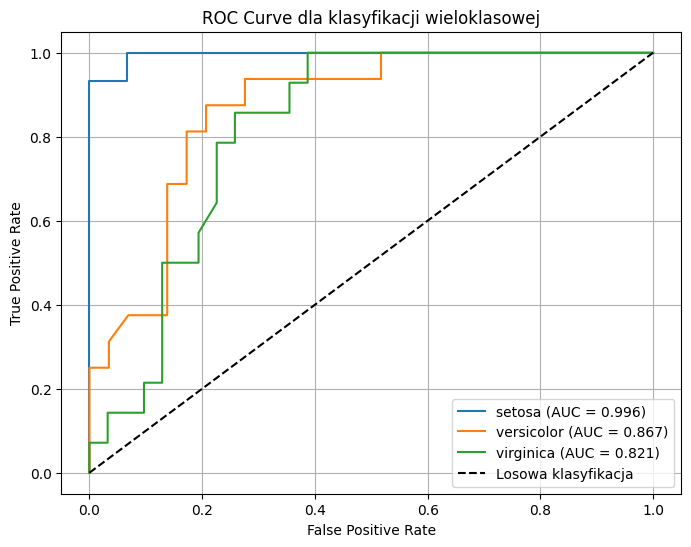

AUC dla każdej klasy:
setosa: 0.996
versicolor: 0.867
virginica: 0.821


In [43]:
# Generowane
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Przygotowanie danych
iris_binary = irisDataFrame.copy()
iris_binary['binary_species'] = iris_binary['species'].apply(lambda x: 1 if x == 'versicolor' else 0)

# Funkcja do rysowania ROC dla wielu klas
def plot_roc_auc_multiclass(mnbc, testSet):
    # Przekształcenie etykiet na format binarny (one-hot encoding)
    y_true = label_binarize(testSet['species'], classes=['setosa', 'versicolor', 'virginica'])
    
    y_scores = []
    for _, row in testSet.iterrows():
        proba = mnbc.predict_proba(row[:-2])  # Prawdopodobieństwa dla każdej klasy
        y_scores.append([proba.get('setosa', 0), proba.get('versicolor', 0), proba.get('virginica', 0)])

    plt.figure(figsize=(8, 6))
    auc_scores = []
    for i, class_name in enumerate(['setosa', 'versicolor', 'virginica']):
        fpr, tpr, _ = roc_curve(y_true[:, i], [score[i] for score in y_scores])
        auc_score = roc_auc_score(y_true[:, i], [score[i] for score in y_scores])
        auc_scores.append(auc_score)
        plt.plot(fpr, tpr, label=f'{class_name} (AUC = {auc_score:.3f})')
    
    plt.plot([0, 1], [0, 1], 'k--', label='Losowa klasyfikacja')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Krzywa ROC dla klasyfikacji wieloklasowej')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Wyświetlenie AUC dla każdej klasy
    print(f"AUC dla każdej klasy:")
    for class_name, auc in zip(['setosa', 'versicolor', 'virginica'], auc_scores):
        print(f'{class_name}: {auc:.3f}')

plot_roc_auc_multiclass(gnbc, testSet)


### k-Fold Cross Validation dla Iris Dataset

k-Fold Cross Validation pozwala na ocenę wydajności modelu poprzez podzielenie danych na k równych części (foldów). Model jest trenowany na k-1 częściach i testowany na pozostałej części, a wyniki są uśredniane.


W naszym przypadku takie samo podejście jest przedstawione w benchmark.py

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

def k_fold_cross_validation_gnbc(gnbc, irisDataFrame, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    accuracies = []

    for train_index, test_index in kf.split(irisDataFrame):
        trainSet = irisDataFrame.iloc[train_index]
        testSet = irisDataFrame.iloc[test_index]
        gnbc.fit(trainSet)
        accuracy = gnbc.test_accuracy(testSet)
        accuracies.append(accuracy)

    avg_accuracy = np.mean(accuracies)
    print(f"Średnia dokładność po {k}-Fold Cross Validation: {avg_accuracy:.3f}")
    return accuracies

# Wywołanie funkcji
k_fold_cross_validation_gnbc(gnbc, irisDataFrame, k=5)


Średnia dokładność po 5-Fold Cross Validation: 0.887


[0.9333333333333333, 0.9, 0.8333333333333334, 0.8666666666666667, 0.9]